# Project 2
## Joanie Gannon

#### Data from: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix


Using TensorFlow backend.


---
### Loading Raw Data
---

We'll read the raw data from the csv into a pandas dataframe

In [2]:
#Read CSV
df = pd.read_csv("data/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv")
#Look at the info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 45 columns):
ID                          13173 non-null float64
age                         1349 non-null object
sex                         1264 non-null object
city                        10194 non-null object
province                    12906 non-null object
country                     13148 non-null object
wuhan(0)_not_wuhan(1)       13170 non-null float64
latitude                    13147 non-null float64
longitude                   13147 non-null float64
geo_resolution              13147 non-null object
date_onset_symptoms         746 non-null object
date_admission_hospital     730 non-null object
date_confirmation           13089 non-null object
symptoms                    493 non-null object
lives_in_Wuhan              565 non-null object
travel_history_dates        503 non-null object
travel_history_location     758 non-null object
reported_market_exposure    35 non-null object
addi

---
### Dropping unused data.
---
We'll start with an inital pass by cleaning up the dataframe. Firstly, we'll be dropping data members that hold little or no informational value for us. This is just based on the type of information and inital scanning of the raw data, and not based on any in-depth analysis (which we will do shortly). These rows do not seem to be useful to the analysis we want to do here, regardless of how clean or dirty the data is. We will be dropping:
- lives_in_Wuhan
- geo_resolution
- lat/longitude
- Additional Information
- Source
- sequence_available
- notes_for_discussion
- Admin
- data_moderator_initials
- Unnamed end columns and any null columns



In [3]:
#Define data we want to drop
dropped_data = ['geo_resolution','source', 'lives_in_Wuhan','latitude','longitude', 'additional_information', 
                'sequence_available','notes_for_discussion', 'admin_id', 'data_moderator_initials', 
                "wuhan(0)_not_wuhan(1)",'admin3','admin2','admin1']
#Drop uneeded data
df = df.drop(columns = dropped_data, errors = 'ignore')

#clear fully null columns
df = df.dropna(axis = 1, how = 'all')
#This will clear all the padded null rows at the end of the dataset
df = df.dropna(axis = 0, how = 'all')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13174 entries, 0 to 13173
Data columns (total 19 columns):
ID                          13173 non-null float64
age                         1349 non-null object
sex                         1264 non-null object
city                        10194 non-null object
province                    12906 non-null object
country                     13148 non-null object
date_onset_symptoms         746 non-null object
date_admission_hospital     730 non-null object
date_confirmation           13089 non-null object
symptoms                    493 non-null object
travel_history_dates        503 non-null object
travel_history_location     758 non-null object
reported_market_exposure    35 non-null object
chronic_disease_binary      18 non-null float64
chronic_disease             13 non-null object
outcome                     184 non-null object
date_death_or_discharge     93 non-null object
location                    1024 non-null object
country_new     

#### Now let's see what the data looks like in these columns

In [4]:
df.describe(include='all')

,ID,age,sex,city,province,country,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,travel_history_dates,travel_history_location,reported_market_exposure,chronic_disease_binary,chronic_disease,outcome,date_death_or_discharge,location,country_new
count,13173.000000,1349,1264,10194,12906,13148,746,730,13089,493,503,758,35,18.000000,13,184,93,1024,13079
unique,NaN,116,5,806,150,51,64,55,47,217,123,178,3,NaN,13,12,38,186,46
top,NaN,50-59,male,Wenzhou City,Guangdong,China,22.01.2020,30.01.2020,29.01.2020,fever,21.01.2020,Wuhan,no,NaN,hypertension,stable,26.02.2020,Yokohama Port,China
freq,NaN,47,703,448,1228,10446,43,45,1091,131,48,380,33,NaN,1,78,8,479,10446
mean,6769.250436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.722222,NaN,NaN,NaN,NaN,NaN
std,3920.886020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460889,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3351.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,NaN
50%,6865.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,10180.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


#### Keeping in mind that we have over 13,000 rows, the following have relatively low non-null counts:
- date_onset_symptoms (746)
- date_admission_hospital (730)
- symptoms (493)
- travel_history_dates (503)
- travel_history_location (758)
- reported_market_exposure (35)
- chronic_disease_binary (18)
- chronic_disease (13)
- outcome (184)
- date_death_or_discharge (93)
- location (1024) 

*(NOTE: these numbers might change slightly, this was based on the dataset from April 3rd)*

This is unfortunate considering this is about half of our dataset, but we can definetly get away with dropping some of these data points. Lets start by dropping the following given their super low counts (less than 300):
- reported_market_exposure
- chronic_disease_binary 
- chronic_disease
- outcome 
- date_death_or_discharge 


In [5]:
#Define data we want to drop
low_data = ['reported_market_exposure','chronic_disease_binary', 'chronic_disease', 'date_death_or_discharge']
#Drop uneeded data
df = df.drop(columns = low_data, errors = 'ignore')

df.describe(include='all')

,ID,age,sex,city,province,country,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,travel_history_dates,travel_history_location,outcome,location,country_new
count,13173.000000,1349,1264,10194,12906,13148,746,730,13089,493,503,758,184,1024,13079
unique,NaN,116,5,806,150,51,64,55,47,217,123,178,12,186,46
top,NaN,50-59,male,Wenzhou City,Guangdong,China,22.01.2020,30.01.2020,29.01.2020,fever,21.01.2020,Wuhan,stable,Yokohama Port,China
freq,NaN,47,703,448,1228,10446,43,45,1091,131,48,380,78,479,10446
mean,6769.250436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3920.886020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3351.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6865.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10180.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Outcome is what we want to look at here, so let's see what the info looks like when we drop all the null outcomes

In [6]:
df = df[~df.outcome.isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 18 to 11801
Data columns (total 15 columns):
ID                         184 non-null float64
age                        162 non-null object
sex                        122 non-null object
city                       165 non-null object
province                   154 non-null object
country                    183 non-null object
date_onset_symptoms        73 non-null object
date_admission_hospital    89 non-null object
date_confirmation          183 non-null object
symptoms                   36 non-null object
travel_history_dates       54 non-null object
travel_history_location    67 non-null object
outcome                    184 non-null object
location                   61 non-null object
country_new                181 non-null object
dtypes: float64(1), object(14)
memory usage: 23.0+ KB


---
### Quick Experiment: merging two datasets
---
We have a bit of an issue here with the origin of the data, so let's see if we can fix some of this by merginf two datasets.

First, let's look at this problem. Here's the countries reported in our data:

In [7]:
#Count how many cases are in each country
df.groupby('country')['ID'].nunique().sort_values(ascending=False)

country
China                   105
Singapore                23
Vietnam                  16
Japan                     8
Italy                     7
France                    4
Iran                      3
Malaysia                  3
Philippines               3
Spain                     2
Canada                    2
Nepal                     1
United Arab Emirates      1
South Korea               1
Germany                   1
Switzerland               1
Egypt                     1
Thailand                  1
Name: ID, dtype: int64

#### We see that this dataset is very weighted towards China, which has over half the data points in this entire set. Let's plot this just to get a better understanding of how much this overwhelmes the dataset.

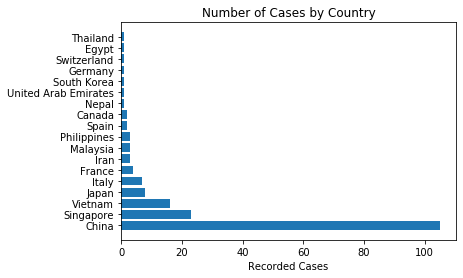

In [8]:
unique_countries = df.groupby('country')['ID'].nunique().sort_values(ascending=False)


#Plot data
plt.barh(unique_countries.index, unique_countries)
plt.title('Number of Cases by Country')
plt.xlabel('Recorded Cases')
plt.show()

---
### Cleaning the data
---
#### Let's make some of these data members smaller and create categoricals for some other ones. Categoricals we will be making are:
- Country
- Sex
- Symptoms

#### We'll also want to cast the following to datetime:
- date_onset_symptoms
- date_admission_hospital
- date_confirmation
- travel_history_dates

#### We'll start with sex

In [9]:
df.sex.unique()

array(['female', 'male', nan], dtype=object)

#### Initially, we see we should cast the string to lower case. 'male' 'female' and nan are the 3 values we'd want for our categorical. 4000 is strange, let's look at that data row.

In [10]:
#df[df.sex == '4000']

#### This looks like a garbage row, so we'll drop it.

In [11]:
#df = df[df.sex != '4000']

#### Now we can make sex a categorical

In [12]:
#set to lowercase
df.sex = df.sex.str.lower()
#extract categorical
cat_sex = pd.Categorical(df.sex)
df.sex = cat_sex

#### Now let's create country categorical

In [13]:
#extract categorical
cat_country = pd.Categorical(df.country)
df.country = cat_country

#### Now we'll make symptoms a categorical. First, let's look at symptoms:

In [14]:
df.head(20).symptoms

18                  fatigue, fever, headache
55                            fatigue, fever
161                               discomfort
175                                      NaN
185                             cough, fever
313     systemic weakness, runny nose, fever
337                                    fever
613                                      NaN
639            chills, cough, fatigue, fever
640     chills, conjunctivitis, cough, fever
641            fever, pneumonia, sore throat
642                cough, fever, sore throat
647        cough, fever, shortness of breath
652                                    fever
663                                      NaN
664                                      NaN
665                             cough, fever
671                    cough, fever, myalgia
676                                      NaN
1055                                     NaN
Name: symptoms, dtype: object

#### The first issue we see is that we need to seperate each symptom. A good way of doing this might be with one-hot encoding. We'll also drop data where symptoms are null

In [15]:
#Dropping null symptoms
#df = df.dropna(subset = ['symptoms'])

In [16]:
#Break out into an array
df.symptoms = df.symptoms.str.split(",")

In [17]:
#Make a new dataframe with just expanded symptoms
symptoms_person = df.explode("symptoms").drop_duplicates().set_index("ID")
symptoms_person = pd.DataFrame(symptoms_person["symptoms"])
symptoms_person.head(10)

,symptoms
ID,
19.0,fatigue
19.0,fever
19.0,headache
56.0,fatigue
56.0,fever
164.0,discomfort
178.0,NaN
192.0,cough
192.0,fever


In [18]:
#Look at how many unique values we have
symptoms_person.symptoms.unique()

array(['fatigue', ' fever', ' headache', 'discomfort', nan, 'cough',
       'systemic weakness', ' runny nose', 'fever', 'chills', ' cough',
       ' fatigue', ' conjunctivitis', ' pneumonia', ' sore throat',
       ' shortness of breath', ' myalgia', ' myalgias',
       'respiratory symptoms', 'lesions on chest radiographs', 'diarrhea',
       ' sputum', 'eye irritation', 'transient fatigue', 'anorexia',
       ' malaise'], dtype=object)

#### This data is very messy, as there are many typos, repeated data, ect. Let's start by condensing all of these fever values

In [19]:
#Make everything lowercase
symptoms_person.symptoms = symptoms_person.symptoms.str.lower()

#Consulted stack overflow for this part
#https://stackoverflow.com/questions/39768547/replace-whole-string-if-it-contains-substring-in-pandas
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*fever.*$)', 'fever')

symptoms_person.symptoms.unique()

array(['fatigue', 'fever', ' headache', 'discomfort', nan, 'cough',
       'systemic weakness', ' runny nose', 'chills', ' cough', ' fatigue',
       ' conjunctivitis', ' pneumonia', ' sore throat',
       ' shortness of breath', ' myalgia', ' myalgias',
       'respiratory symptoms', 'lesions on chest radiographs', 'diarrhea',
       ' sputum', 'eye irritation', 'transient fatigue', 'anorexia',
       ' malaise'], dtype=object)

#### Now we'll repeat this process by condesning similar symptoms and correcting typos

In [20]:
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*cough.*$)', 'cough')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*wheez.*$)', 'cough')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*couh.*$)', 'cough')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*sputum.*$)', 'phlegm')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*expectoration.*$)', 'phlegm')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*phlegm.*$)', 'phlegm')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*nausea.*$)', 'nausea')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*vomiting.*$)', 'vomiting')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*fatigue.*$)', 'fatigue/soreness')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*weak.*$)', 'fatigue/soreness')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*sore.*$)', 'fatigue/soreness')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*energy.*$)', 'fatigue/soreness')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*rigor.*$)', 'fatigue/soreness')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*full body slump.*$)', 'fatigue/soreness')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*pneumonitis.*$)', 'pneumonia')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*pulmonary.*$)', 'pneumonia')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*pleural.*$)', 'pneumonia')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*pneumonia.*$)', 'pneumonia')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*myalgia.*$)', 'muscle pain/aches')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*musc.*$)', 'muscle pain/aches')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*joint pain.*$)', 'muscle pain/aches')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*sneez.*$)', 'sneeze')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*respiratory.*$)', 'respiratory problems')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*malaise.*$)', 'discomfort')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*discomfort.*$)', 'discomfort')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*rhinorrh.*$)', 'nasal congestion')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*nasal.*$)', 'nasal congestion')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*dizz.*$)', 'dizziness')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*headache.*$)', 'headache')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*abdominal.*$)', 'chest pain')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*chest.*$)', 'chest pain')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*nose.*$)', 'runny nose')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*chill.*$)', 'chills')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*pharyn.*$)', 'pharyngeal problems')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*flu.*$)', 'flu-like symptoms')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*dry.*$)', 'dry mouth/throat')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*conjunctivitis.*$)', 'eye irritation')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*eye.*$)', 'eye irritation')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*anhelation.*$)', 'shortness of breath/difficult breathing')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*breath.*$)', 'shortness of breath/difficult breathing')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*dyspnea.*$)', 'shortness of breath/difficult breathing')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*diarrhea.*$)', 'diarrhea')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*diarrheoa.*$)', 'diarrhea')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*diarrhoea.*$)', 'diarrhea')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*toothache.*$)', 'toothache')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*rever.*$)', 'fever')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*3.*$)', 'fever')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*sweating.*$)', 'sweating')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*anorexia.*$)', 'anorexia')

symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*no .*$)', 'asymptomatic')
#Others
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*other.*$)', 'other')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*yes.*$)', 'other')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*mild.*$)', 'other')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*poor physical condition.*$)', 'other')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*discharge.*$)', 'other')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*feeling ill.*$)', 'other')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*eventually showed acute.*$)', 'other')
symptoms_person.symptoms = symptoms_person.symptoms.str.replace(r'(^.*difficulty walking.*$)', 'other')

print(symptoms_person.symptoms.nunique())
symptoms_person.symptoms.unique()

16


array(['fatigue/soreness', 'fever', 'headache', 'discomfort', nan,
       'cough', 'runny nose', 'chills', 'eye irritation', 'pneumonia',
       'shortness of breath/difficult breathing', 'muscle pain/aches',
       'respiratory problems', 'chest pain', 'diarrhea', 'phlegm',
       'anorexia'], dtype=object)

In [21]:
symptoms_person.symptoms
#extract categorical
cat_symptoms = pd.Categorical(symptoms_person.symptoms)
symptoms_person.symptoms = cat_symptoms

#### Now we merge them back into the origional dataframe. This WILL end up dropping all null symptom data, but that is ok since it's the data we want to look at.

In [22]:
#Make this a one-hot encoded list
symptoms_person = pd.get_dummies(data = symptoms_person).groupby('ID').sum()
#Reset index for the dataframe
df.index = df.ID
df = df.drop(columns = ['ID'])

In [23]:
#Drop symptoms before we merge new ones in
df = df.drop(columns = ['symptoms'], errors = "ignore")
#df.merge(right = symptoms_person, right_on = 'ID', left_on = 'ID')

df = pd.concat([df,symptoms_person], axis=1,join = 'inner' ,sort=False)
df

,age,sex,city,province,country,date_onset_symptoms,date_admission_hospital,date_confirmation,travel_history_dates,travel_history_location,...,symptoms_eye irritation,symptoms_fatigue/soreness,symptoms_fever,symptoms_headache,symptoms_muscle pain/aches,symptoms_phlegm,symptoms_pneumonia,symptoms_respiratory problems,symptoms_runny nose,symptoms_shortness of breath/difficult breathing
ID,,,,,,,,,,,,,,,,,,,,,
19.0,NaN,female,Daxing District,Beijing,China,08.01.2020,08.01.2020,21.01.2020,08.01.2020,Wuhan,...,0,1,1,1,0,0,0,0,0,0
56.0,44,female,Wushan County,Chongqing,China,15.01.2020,15.01.2020,21.01.2020,15.01.2020,Wuhan,...,0,1,1,0,0,0,0,0,0,0
164.0,29,male,Fangchenggang City,Guangxi,China,23.01.2020,23.01.2020,24.01.2020,23.01.2020,"Ezhou City, Hubei",...,0,0,0,0,0,0,0,0,0,0
178.0,NaN,NaN,Suihua City,Heilongjiang,China,NaN,NaN,24.01.2020,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
192.0,39,male,Hong Kong,Hong Kong,China,21.01.2020,21.01.2020,22.01.2020,NaN,Wuhan,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12042.0,NaN,NaN,Dingxi City,Gansu,China,NaN,22.01.2020,25.01.2020,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
12043.0,33,female,"Yongdeng County, Lanzhou City",Gansu,China,NaN,23.01.2020,24.01.2020,18.01.2020,Wuhan,...,0,0,0,0,0,0,0,0,0,0
12046.0,58,female,National Centre for Infectious Diseases,NaN,Singapore,23.01.2020,18.02.2020,22.02.2020,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 184 entries, 19.0 to 12107.0
Data columns (total 29 columns):
age                                                 162 non-null object
sex                                                 122 non-null category
city                                                165 non-null object
province                                            154 non-null object
country                                             183 non-null category
date_onset_symptoms                                 73 non-null object
date_admission_hospital                             89 non-null object
date_confirmation                                   183 non-null object
travel_history_dates                                54 non-null object
travel_history_location                             67 non-null object
outcome                                             184 non-null object
location                                            61 non-null object
country_new            

#### Now let's turn the dates into datetime objects

In [25]:
df['date_onset_symptoms'] = pd.to_datetime(df['date_onset_symptoms'], errors = 'coerce')
df['date_admission_hospital'] = pd.to_datetime(df['date_admission_hospital'], errors = 'coerce')
df['date_confirmation'] = pd.to_datetime(df['date_confirmation'], errors = 'coerce')
df['travel_history_dates'] = pd.to_datetime(df['travel_history_dates'], errors = 'coerce')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 184 entries, 19.0 to 12107.0
Data columns (total 29 columns):
age                                                 162 non-null object
sex                                                 122 non-null category
city                                                165 non-null object
province                                            154 non-null object
country                                             183 non-null category
date_onset_symptoms                                 73 non-null datetime64[ns]
date_admission_hospital                             89 non-null datetime64[ns]
date_confirmation                                   182 non-null datetime64[ns]
travel_history_dates                                49 non-null datetime64[ns]
travel_history_location                             67 non-null object
outcome                                             184 non-null object
location                                            61 non-nul

#### Now let's deal with age

In [27]:
df.age.head(20)

ID
19.0      NaN
56.0       44
164.0      29
178.0     NaN
192.0      39
320.0      39
344.0      46
620.0      27
646.0      30
647.0      31
648.0      40
649.0      30
654.0      32
659.0      55
670.0      66
671.0      28
672.0      40
678.0      51
683.0      56
1062.0     42
Name: age, dtype: object

#### We have a lot of 'ranges', such as 40-49, so let's fix that by averaging the range into a single value

In [28]:
df.age = df.age.astype(str)
#This lambda parses out first and last digits in the range and averages them
df.age = df.age.apply(lambda x: round((int(x[0:x.find('-')]) + int(x[x.find('-')+1:]))/2)
             if '-' in x else x)
df.age = df.age.apply(pd.to_numeric, errors='coerce', downcast = 'integer')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 184 entries, 19.0 to 12107.0
Data columns (total 29 columns):
age                                                 162 non-null float64
sex                                                 122 non-null category
city                                                165 non-null object
province                                            154 non-null object
country                                             183 non-null category
date_onset_symptoms                                 73 non-null datetime64[ns]
date_admission_hospital                             89 non-null datetime64[ns]
date_confirmation                                   182 non-null datetime64[ns]
travel_history_dates                                49 non-null datetime64[ns]
travel_history_location                             67 non-null object
outcome                                             184 non-null object
location                                            61 non-nu

#### As a last step, we'll drop some of the things we probably wont use for now. If we want to use them later, they've already been cleaned so we can just remove the drop statement here

In [30]:
#Define data we want to drop
dropped_data = ['ID','city','province','country_new','location','travel_history_location','travel_history_dates']
#Drop uneeded data
df = df.drop(columns = dropped_data, errors = 'ignore')

df

,age,sex,country,date_onset_symptoms,date_admission_hospital,date_confirmation,outcome,symptoms_anorexia,symptoms_chest pain,symptoms_chills,...,symptoms_eye irritation,symptoms_fatigue/soreness,symptoms_fever,symptoms_headache,symptoms_muscle pain/aches,symptoms_phlegm,symptoms_pneumonia,symptoms_respiratory problems,symptoms_runny nose,symptoms_shortness of breath/difficult breathing
ID,,,,,,,,,,,,,,,,,,,,,
19.0,NaN,female,China,2020-08-01,2020-08-01,2020-01-21,discharged,0,0,0,...,0,1,1,1,0,0,0,0,0,0
56.0,44.0,female,China,2020-01-15,2020-01-15,2020-01-21,discharged,0,0,0,...,0,1,1,0,0,0,0,0,0,0
164.0,29.0,male,China,2020-01-23,2020-01-23,2020-01-24,discharge,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178.0,NaN,NaN,China,NaT,NaT,2020-01-24,died,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192.0,39.0,male,China,2020-01-21,2020-01-21,2020-01-22,died,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12042.0,NaN,NaN,China,NaT,2020-01-22,2020-01-25,discharged,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12043.0,33.0,female,China,NaT,2020-01-23,2020-01-24,discharged,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12046.0,58.0,female,Singapore,2020-01-23,2020-02-18,2020-02-22,discharge,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 184 entries, 19.0 to 12107.0
Data columns (total 23 columns):
age                                                 162 non-null float64
sex                                                 122 non-null category
country                                             183 non-null category
date_onset_symptoms                                 73 non-null datetime64[ns]
date_admission_hospital                             89 non-null datetime64[ns]
date_confirmation                                   182 non-null datetime64[ns]
outcome                                             184 non-null object
symptoms_anorexia                                   184 non-null uint8
symptoms_chest pain                                 184 non-null uint8
symptoms_chills                                     184 non-null uint8
symptoms_cough                                      184 non-null uint8
symptoms_diarrhea                                   184 non-null uint8


### Now let's handle the outcome column by turning it into a 0 or 1. 0 being discharged and 1 being died

In [32]:
df.outcome.unique()

array(['discharged', 'discharge', 'died', 'Discharged', '05.02.2020',
       'death',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'recovered', 'stable',
       'critical condition, intubated as of 14.02.2020',
       'treated in an intensive care unit (14.02.2020)', 'severe'],
      dtype=object)

In [33]:
df.outcome = df.outcome.str.lower()

#Drop garbage data
df = df[df.outcome != '05.02.2020']
df = df[df.outcome != 'symptoms only improved with cough. currently hospitalized for follow-up.']
df = df[df.outcome != 'treated in an intensive care unit (14.02.2020)']
df = df[df.outcome != 'critical condition, intubated as of 14.02.2020']

#Condense discharged
df.outcome = df.outcome.str.replace(r'(^.*discharge.*$)', '0')
df.outcome = df.outcome.str.replace(r'(^.*recovered.*$)', '0')
df.outcome = df.outcome.str.replace(r'(^.*stable.*$)', '0')

#Condense died
df.outcome = df.outcome.str.replace(r'(^.*severe.*$)', '1')
df.outcome = df.outcome.str.replace(r'(^.*die.*$)', '1')
df.outcome = df.outcome.str.replace(r'(^.*death.*$)', '1')

#Turn it into an int
df.outcome = df.outcome.astype('int')
df = df.rename(columns = {'outcome':'died'})


---
# Using keras
---

### We'll start by setting up our data for Keras. 


##### First, we need to fix an issue with the timeseries. Keras can't process timeseries, so instead we'll take the `date_onset_symptoms`, `date_admission_hospital`, `date_confirmation`. and turn them to ints. 

##### How? We'll create `symptoms_to_hospital` and `symptoms_to_confirmation`. These will be integer values that represent the number of days between the timestamps. 

In [34]:
df['symptoms_to_hospital'] = (df.date_admission_hospital - df.date_onset_symptoms).dt.days.astype('Int16')
df['symptoms_to_confirmation'] = (df.date_confirmation - df.date_onset_symptoms).dt.days.astype('Int16')
df = df.drop(columns = ['date_onset_symptoms', 'date_admission_hospital', 'date_confirmation'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 180 entries, 19.0 to 12107.0
Data columns (total 22 columns):
age                                                 159 non-null float64
sex                                                 118 non-null category
country                                             179 non-null category
died                                                180 non-null int64
symptoms_anorexia                                   180 non-null uint8
symptoms_chest pain                                 180 non-null uint8
symptoms_chills                                     180 non-null uint8
symptoms_cough                                      180 non-null uint8
symptoms_diarrhea                                   180 non-null uint8
symptoms_discomfort                                 180 non-null uint8
symptoms_eye irritation                             180 non-null uint8
symptoms_fatigue/soreness                           180 non-null uint8
symptoms_fever            

#### Now we have to deal with filling in nulls. Starting with the timestamps, these nulls would be caused by no symptoms so we'll fill them all with 0

In [35]:
df.symptoms_to_hospital = df.symptoms_to_hospital.fillna(0)
df.symptoms_to_confirmation = df.symptoms_to_confirmation.fillna(0)

#We'll drop the rest of these nulls
df = df[~df.sex.isna()]
df = df[~df.age.isna()]
df = df[~df.country.isna()]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 111 entries, 56.0 to 12106.0
Data columns (total 22 columns):
age                                                 111 non-null float64
sex                                                 111 non-null category
country                                             111 non-null category
died                                                111 non-null int64
symptoms_anorexia                                   111 non-null uint8
symptoms_chest pain                                 111 non-null uint8
symptoms_chills                                     111 non-null uint8
symptoms_cough                                      111 non-null uint8
symptoms_diarrhea                                   111 non-null uint8
symptoms_discomfort                                 111 non-null uint8
symptoms_eye irritation                             111 non-null uint8
symptoms_fatigue/soreness                           111 non-null uint8
symptoms_fever            

In [37]:
#Split into input and target 
df_X = df.drop(columns = 'died')
df_y = df.loc[:,['died']]

# I have to fix the categoricals to be encoded as well. I used some code from the following website
#https://intellipaat.com/community/17689/how-to-use-ordered-categorical-columns-in-keras-could-not-convert-string-to-float-category
category_columns = list(df_X.select_dtypes(['category']).columns)
df_X[category_columns] = df_X[category_columns].apply(lambda x: x.cat.codes)

#Shuffle
df_X_shuf, df_y_shuf = shuffle(df_X, df_y, random_state=0)

#Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(df_X_shuf, df_y_shuf, test_size=0.3, random_state=0)

#### We're going to try a neural network for this. Therefore, we need to transform the output into one hot encoding

In [38]:
y_train = pd.get_dummies(data = y_train)
y_test = pd.get_dummies(data = y_test)

#### Now let's make our model

#### Our neural net will have 21 input nodes and 1 output node. Let's start with a simple net that has 1 hidden layer. Softmax is a good choice for the output, but sigmoid was chose somewhat arbitrarily chosen as well as number of hidden nodes. We can adjust this afterwards to see how they change the results.

#### Then we compile the the model.
- Optomizer is sgd bc it is most commonly used, so it will be fine for our first attempt
- Loss is hoe backpropegation is calculated. MSE will be ok for our first pass.
- Metrics will be accuracy since that's a good baseline to lookat for this problem

In [39]:
#Sequential is a linear stack of layers

def create_model():
    model = Sequential()
    #Input layer
    #The first is always the input layer, so we need to specify input shape as first argument
    model.add(Dense(10, activation = 'sigmoid', input_dim=21))
    #This is the output
    model.add(Dense(1, activation = 'sigmoid'))
    
    #Compile
    model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

#### Now we train the model, we'll do 100 epochs

In [40]:
#history = model.fit(x = X_train, y = y_train, verbose = 0,
#          epochs=100, batch_size=1, validation_data = (X_test, y_test))

In [41]:
# evaluate model with standardized dataset

estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=1, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, df_X, df_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Baseline: 88.33% (5.67%)


In [42]:
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True)
cvscores = []
for train, test in kfold.split(df_X, df_y):
  # create model
	model = create_model()
	# Fit the model
	model.fit(x = df_X_shuf.iloc[train], y = df_y_shuf.iloc[train], epochs=100, batch_size=1, verbose=0)
	# evaluate the model
	scores = model.evaluate(df_X_shuf.iloc[test], df_y_shuf.iloc[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 100.00%
accuracy: 100.00%
accuracy: 81.82%
accuracy: 81.82%
accuracy: 81.82%
accuracy: 90.91%
accuracy: 72.73%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 90.91%
90.00% (+/- 9.49%)


### This will take a while to run, but let's try a couple variations.
- Adding another hidden layer.
- Changing the optomizer from sgd to adam
- Changing the activation function from sigmoid to reLu

#### First, we define the models

In [43]:
def extra_layer():
    model = Sequential()
    #Input layer
    model.add(Dense(10, activation = 'sigmoid', input_dim=21))
    #Hidden layer
    model.add(Dense(15, activation = 'sigmoid'))
    #This is the output
    model.add(Dense(1, activation = 'sigmoid'))
    
    #Compile
    model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

def adam_model():
    model = Sequential()
    #Input layer
    #The first is always the input layer, so we need to specify input shape as first argument
    model.add(Dense(10, activation = 'sigmoid', input_dim=21))
    #This is the output
    model.add(Dense(1, activation = 'sigmoid'))
    
    #Compile
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

def relu_model():
    model = Sequential()
    #Input layer
    #The first is always the input layer, so we need to specify input shape as first argument
    model.add(Dense(10, activation = 'relu', input_dim=21))
    #This is the output
    model.add(Dense(1, activation = 'sigmoid'))
    
    #Compile
    model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

#y_pred = model.predict_classes(X_test, batch_size=2, verbose=1)

#### Now, we train them using k-fold

In [44]:
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True)

cvscores_layers = []
cvscores_adam = []
cvscores_relu = []

for train, test in kfold.split(df_X, df_y):
  # create models
    model_layer = extra_layer()
    model_adam = adam_model()
    model_relu = relu_model()
    
	# Fit the models
    model_layer.fit(x = df_X_shuf.iloc[train], y = df_y_shuf.iloc[train], epochs=25, batch_size=2, verbose=0)
    model_adam.fit(x = df_X_shuf.iloc[train], y = df_y_shuf.iloc[train], epochs=25, batch_size=2, verbose=0)
    model_relu.fit(x = df_X_shuf.iloc[train], y = df_y_shuf.iloc[train], epochs=25, batch_size=2, verbose=0)
    
	# evaluate the model
    scores_layer = model_layer.evaluate(df_X_shuf.iloc[test], df_y_shuf.iloc[test], verbose=0)
    scores_adam = model_adam.evaluate(df_X_shuf.iloc[test], df_y_shuf.iloc[test], verbose=0)
    scores_relu = model_relu.evaluate(df_X_shuf.iloc[test], df_y_shuf.iloc[test], verbose=0)
    print("Extra layer %s: %.2f%%  |  Adam %s: %.2f%%  |  Relu %s: %.2f%%" % 
          (model_layer.metrics_names[1], scores_layer[1]*100, model_adam.metrics_names[1], 
           scores_adam[1]*100, model_relu.metrics_names[1], scores_relu[1]*100))
    
    cvscores_layers.append(scores_layer[1] * 100)
    cvscores_adam.append(scores_adam[1] * 100)
    cvscores_relu.append(scores_relu[1] * 100)

print("Overall:")
print("Extra layer: %.2f%% (+/- %.2f%%)  |  Extra layer: %.2f%% (+/- %.2f%%)  |  Extra layer: %.2f%% (+/- %.2f%%)" % 
      (np.mean(cvscores_layers), np.std(cvscores_layers),
       np.mean(cvscores_adam), np.std(cvscores_adam),
       np.mean(cvscores_relu), np.std(cvscores_relu)))

Extra layer accuracy: 91.67%  |  Adam accuracy: 91.67%  |  Relu accuracy: 91.67%
Extra layer accuracy: 90.91%  |  Adam accuracy: 90.91%  |  Relu accuracy: 90.91%
Extra layer accuracy: 90.91%  |  Adam accuracy: 90.91%  |  Relu accuracy: 90.91%
Extra layer accuracy: 90.91%  |  Adam accuracy: 90.91%  |  Relu accuracy: 90.91%
Extra layer accuracy: 100.00%  |  Adam accuracy: 100.00%  |  Relu accuracy: 100.00%
Extra layer accuracy: 81.82%  |  Adam accuracy: 81.82%  |  Relu accuracy: 81.82%
Extra layer accuracy: 100.00%  |  Adam accuracy: 100.00%  |  Relu accuracy: 100.00%
Extra layer accuracy: 81.82%  |  Adam accuracy: 81.82%  |  Relu accuracy: 72.73%
Extra layer accuracy: 72.73%  |  Adam accuracy: 72.73%  |  Relu accuracy: 72.73%
Extra layer accuracy: 100.00%  |  Adam accuracy: 100.00%  |  Relu accuracy: 100.00%
Overall:
Extra layer: 90.08% (+/- 8.59%)  |  Extra layer: 90.08% (+/- 8.59%)  |  Extra layer: 89.17% (+/- 9.81%)


#### We see that the extra layer was most effective, so we'll use that.

----
# Now let's predict the outcome of a case given the information filled out in the following cells:

---

In [46]:
#~~~~ Edit information here for prediction ~~~~~

#Input your age
age = 21
# Female: 0 Male: 1 Nan: -1
sex = 0
# Nan:-1 Canada:0 China:1 Egypt:2 France:3 Germany:4 Iran:5 Italy:6 Japan:7 Malaysia:8 Nepal:9 Philippines:10
# Singapore:11 South Korea:12 Spain:13 Switzerland:14 Thailand:15 United Arab Emirates:16 Vietnam:17
country = 0
#Put 1 for any symptoms being experienced, 0 otherwise
symptoms = [0, #anorexia
            0, #chest pain
            0, #chills
            0, #cough
            0, #diarrhea
            0, #discomfort
            0, #irritation
            1, #fatigue/soreness
            1, #fever
            0, #headache
            0, #muscle pain/aches
            0, #phlegm
            0, #pneumonia
            0, #respiratory problems
            0, #runny nose
            0] #shortness of breath/difficult breathing
#Days from when symptoms began to arrival at hospital (0 if never went to hospital)
symptoms_to_hospital = 2                       
#Days from when symptoms began to confirmation of COVID (0 if never cofirmed)
symptoms_to_confirmation = 0


#~~~~ Do not edit Past here ~~~~~~
prediction = [age,sex,country] + symptoms + [symptoms_to_hospital,symptoms_to_confirmation]
y_pred = model_layer.predict(np.array( [prediction,] ) )
print("Probability of death is %.2f%%"% (y_pred[0][0] *100))

Probability of death is 11.99%
